# UN Greenhouse Gas Emissions - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on UN greenhouse gas emissions data, including:
- Data loading and initial exploration
- Data integrity checks and missing value analysis
- Data combination and preprocessing
- Feature engineering
- Statistical analysis and visualizations

## Dataset Overview
The dataset contains emissions data for different greenhouse gases:
- **CO2**: Carbon Dioxide emissions (excluding Land Use)
- **Methane**: Methane (CH4) emissions (excluding Land Use) 
- **HFC**: Hydrofluorocarbons emissions
- **Total GHG**: Total Greenhouse Gas emissions (excluding Land Use)

All values are measured in kilotonnes of CO2 equivalent.

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

Let's start by loading all the greenhouse gas datasets and examining their structure.

In [22]:
# Define data directory path
data_dir = Path("un-greenhouse-gas-data")

# Load all datasets
datasets = {}
file_mappings = {
    'co2': 'UNdata_Export_co2.csv',
    'methane': 'UNdata_Export_methane.csv', 
    'hfc': 'UNdata_Export_hfc.csv',
    'total_ghg': 'UNdata_Export_greenhouse_gas.csv'
}

print("Loading datasets...")
for gas_type, filename in file_mappings.items():
    file_path = data_dir / filename
    datasets[gas_type] = pd.read_csv(file_path)
    print(f"✓ Loaded {gas_type}: {datasets[gas_type].shape}")

print(f"\nSuccessfully loaded {len(datasets)} datasets!")

Loading datasets...
✓ Loaded co2: (1375, 3)
✓ Loaded methane: (1375, 3)
✓ Loaded hfc: (1300, 3)
✓ Loaded total_ghg: (1375, 3)

Successfully loaded 4 datasets!


In [23]:
# Examine the structure of each dataset
print("=== DATASET STRUCTURE OVERVIEW ===\n")

for gas_type, df in datasets.items():
    print(f"{gas_type.upper()} Dataset:")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Data types:\n{df.dtypes}")
    print(f"   Sample data:")
    print(df.head(3))
    print("-" * 60)

# Check if all datasets have the same structure
print("\n=== COLUMN CONSISTENCY CHECK ===")
column_sets = [set(df.columns) for df in datasets.values()]
if all(cols == column_sets[0] for cols in column_sets):
    print("✓ All datasets have identical column structure")
else:
    print("Datasets have different column structures")
    for gas_type, df in datasets.items():
        print(f"   {gas_type}: {list(df.columns)}")

=== DATASET STRUCTURE OVERVIEW ===

CO2 Dataset:
   Shape: (1375, 3)
   Columns: ['Country or Area', 'Year', 'Value']
   Data types:
Country or Area     object
Year                 int64
Value              float64
dtype: object
   Sample data:
  Country or Area  Year          Value
0       Australia  2020  400333.466600
1       Australia  2019  416761.933416
2       Australia  2018  416283.827446
------------------------------------------------------------
METHANE Dataset:
   Shape: (1375, 3)
   Columns: ['Country or Area', 'Year', 'Value']
   Data types:
Country or Area     object
Year                 int64
Value              float64
dtype: object
   Sample data:
  Country or Area  Year          Value
0       Australia  2020   97303.735168
1       Australia  2019   99367.731400
2       Australia  2018  105796.247541
------------------------------------------------------------
HFC Dataset:
   Shape: (1300, 3)
   Columns: ['Country or Area', 'Year', 'Value']
   Data types:
Country or Ar

## 2. Data Integrity Analysis

Now let's check for data quality issues including missing values, duplicates, and data consistency.

In [24]:
# Data integrity analysis
def analyze_data_integrity(datasets):
    integrity_report = {}
    
    print("=== DATA INTEGRITY ANALYSIS ===\n")
    
    for gas_type, df in datasets.items():
        print(f"{gas_type.upper()} Dataset Analysis:")
        
        # Basic info
        total_rows = len(df)
        
        # Missing values analysis
        missing_values = df.isnull().sum()
        missing_percentage = (missing_values / total_rows * 100).round(2)
        
        # Duplicate analysis
        duplicates = df.duplicated().sum()
        
        # Value analysis
        if 'Value' in df.columns:
            # Convert Value to numeric, handling any string values
            df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
            negative_values = (df['Value'] < 0).sum()
            zero_values = (df['Value'] == 0).sum()
            na_values = df['Value'].isna().sum()
        
        # Year range
        if 'Year' in df.columns:
            year_range = f"{df['Year'].min()} - {df['Year'].max()}"
            unique_years = df['Year'].nunique()
        
        # Countries
        if 'Country or Area' in df.columns:
            unique_countries = df['Country or Area'].nunique()
            top_countries = df['Country or Area'].value_counts().head(5)
        
        # Store results
        integrity_report[gas_type] = {
            'total_rows': total_rows,
            'missing_values': dict(missing_values),
            'missing_percentage': dict(missing_percentage),
            'duplicates': duplicates,
            'negative_values': negative_values if 'Value' in df.columns else 0,
            'zero_values': zero_values if 'Value' in df.columns else 0,
            'na_values': na_values if 'Value' in df.columns else 0,
            'year_range': year_range if 'Year' in df.columns else 'N/A',
            'unique_years': unique_years if 'Year' in df.columns else 0,
            'unique_countries': unique_countries if 'Country or Area' in df.columns else 0
        }
        
        # Print summary
        print(f"   Total rows: {total_rows:,}")
        print(f"   Missing values: {dict(missing_values)}")
        print(f"   Missing percentage: {dict(missing_percentage)}")
        print(f"   Duplicate rows: {duplicates}")
        if 'Value' in df.columns:
            print(f"   Negative values: {negative_values}")
            print(f"   Zero values: {zero_values}")
            print(f"   NA values after conversion: {na_values}")
        if 'Year' in df.columns:
            print(f"   Year range: {year_range} ({unique_years} unique years)")
        if 'Country or Area' in df.columns:
            print(f"   Unique countries: {unique_countries}")
        print("-" * 60)
    
    return integrity_report

# Run integrity analysis
integrity_report = analyze_data_integrity(datasets)

=== DATA INTEGRITY ANALYSIS ===

CO2 Dataset Analysis:
   Total rows: 1,375
   Missing values: {'Country or Area': np.int64(0), 'Year': np.int64(0), 'Value': np.int64(0)}
   Missing percentage: {'Country or Area': np.float64(0.0), 'Year': np.float64(0.0), 'Value': np.float64(0.0)}
   Duplicate rows: 0
   Negative values: 0
   Zero values: 0
   NA values after conversion: 0
   Year range: 1990 - 2021 (32 unique years)
   Unique countries: 43
------------------------------------------------------------
METHANE Dataset Analysis:
   Total rows: 1,375
   Missing values: {'Country or Area': np.int64(0), 'Year': np.int64(0), 'Value': np.int64(0)}
   Missing percentage: {'Country or Area': np.float64(0.0), 'Year': np.float64(0.0), 'Value': np.float64(0.0)}
   Duplicate rows: 0
   Negative values: 0
   Zero values: 0
   NA values after conversion: 0
   Year range: 1990 - 2021 (32 unique years)
   Unique countries: 43
------------------------------------------------------------
HFC Dataset Analy

## 3. Data Cleaning and Preparation

Let's clean the data and prepare it for analysis by handling missing values and standardizing formats.

In [25]:
# Clean and standardize datasets
def clean_datasets(datasets):
    cleaned_datasets = {}
    
    print("=== DATA CLEANING ===\n")
    
    for gas_type, df in datasets.items():
        print(f"🧹 Cleaning {gas_type} dataset...")
        
        # Create a copy to avoid modifying original
        df_clean = df.copy()
        
        # Standardize column names
        df_clean.columns = df_clean.columns.str.strip()
        
        # Convert Value to numeric
        if 'Value' in df_clean.columns:
            df_clean['Value'] = pd.to_numeric(df_clean['Value'], errors='coerce')
        
        # Convert Year to integer
        if 'Year' in df_clean.columns:
            df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce').astype('Int64')
        
        # Clean country names
        if 'Country or Area' in df_clean.columns:
            df_clean['Country or Area'] = df_clean['Country or Area'].str.strip()
        
        # Remove rows with all missing values
        df_clean = df_clean.dropna(how='all')
        
        # Add gas type identifier
        df_clean['Gas_Type'] = gas_type
        
        cleaned_datasets[gas_type] = df_clean
        
        print(f"   Original shape: {df.shape}")
        print(f"   Cleaned shape: {df_clean.shape}")
        rows_removed = df.shape[0] - df_clean.shape[0]
        print(f"   Rows removed: {rows_removed}")
        print("-" * 40)
    
    return cleaned_datasets

# Clean all datasets
cleaned_datasets = clean_datasets(datasets)

print("Data cleaning completed!")

=== DATA CLEANING ===

🧹 Cleaning co2 dataset...
   Original shape: (1375, 3)
   Cleaned shape: (1375, 4)
   Rows removed: 0
----------------------------------------
🧹 Cleaning methane dataset...
   Original shape: (1375, 3)
   Cleaned shape: (1375, 4)
   Rows removed: 0
----------------------------------------
🧹 Cleaning hfc dataset...
   Original shape: (1300, 3)
   Cleaned shape: (1300, 4)
   Rows removed: 0
----------------------------------------
🧹 Cleaning total_ghg dataset...
   Original shape: (1375, 3)
   Cleaned shape: (1375, 4)
   Rows removed: 0
----------------------------------------
Data cleaning completed!


## 4. Data Combination and Integration

Now let's combine all the datasets into a comprehensive master dataset for analysis.

In [26]:
# Combine all datasets into a master dataset
print("=== COMBINING DATASETS ===\n")

# Method 1: Stack all datasets vertically
combined_long = pd.concat(cleaned_datasets.values(), ignore_index=True)

print(f"Combined dataset (long format):")
print(f"   Shape: {combined_long.shape}")
print(f"   Columns: {list(combined_long.columns)}")
print(f"   Gas types: {combined_long['Gas_Type'].unique()}")

# Method 2: Pivot to wide format for easier analysis
print(f"\nCreating wide format dataset...")

# Create wide format with each gas type as a column
combined_wide = combined_long.pivot_table(
    index=['Country or Area', 'Year'], 
    columns='Gas_Type', 
    values='Value', 
    aggfunc='first'  # Use first value if duplicates exist
).reset_index()

# Flatten column names
combined_wide.columns.name = None
combined_wide = combined_wide.rename_axis(None, axis=1)

print(f"   Wide format shape: {combined_wide.shape}")
print(f"   Columns: {list(combined_wide.columns)}")

# Display sample of both formats
print(f"\nSample of long format:")
print(combined_long.head())

print(f"\nSample of wide format:")
print(combined_wide.head())

=== COMBINING DATASETS ===

Combined dataset (long format):
   Shape: (5425, 4)
   Columns: ['Country or Area', 'Year', 'Value', 'Gas_Type']
   Gas types: ['co2' 'methane' 'hfc' 'total_ghg']

Creating wide format dataset...
   Wide format shape: (1375, 6)
   Columns: ['Country or Area', 'Year', 'co2', 'hfc', 'methane', 'total_ghg']

Sample of long format:
  Country or Area  Year          Value Gas_Type
0       Australia  2020  400333.466600      co2
1       Australia  2019  416761.933416      co2
2       Australia  2018  416283.827446      co2
3       Australia  2017  414358.311524      co2
4       Australia  2016  411264.287715      co2

Sample of wide format:
  Country or Area  Year            co2          hfc        methane  \
0       Australia  1990  278154.156296  1424.683520  125133.249409   
1       Australia  1991  279528.510123  1424.683520  124199.251540   
2       Australia  1992  284525.344621  1333.184000  123239.843555   
3       Australia  1993  288870.536763  1829.87200

## 5. Feature Engineering

Let's create additional features that will be useful for analysis and dashboard creation.

In [27]:
# Feature Engineering
def create_features(df_wide, df_long):
    """Create additional features for analysis"""
    
    print("=== FEATURE ENGINEERING ===\n")
    
    # Work with wide format for most features
    df_features = df_wide.copy()
    
    # 1. Fill missing values with 0 for gas columns (assuming 0 emissions if not reported)
    gas_columns = ['co2', 'methane', 'hfc', 'total_ghg']
    available_gas_cols = [col for col in gas_columns if col in df_features.columns]
    
    print(f"🔧 Available gas columns: {available_gas_cols}")
    
    for col in available_gas_cols:
        df_features[col] = df_features[col].fillna(0)
    
    # 2. Create time-based features
    df_features['Decade'] = (df_features['Year'] // 10) * 10
    df_features['Year_Group'] = pd.cut(df_features['Year'], 
                                     bins=[1989, 1999, 2009, 2019, 2030], 
                                     labels=['1990s', '2000s', '2010s', '2020s'])
    
    # 3. Calculate proportions (if total_ghg exists)
    if 'total_ghg' in df_features.columns:
        # Avoid division by zero
        df_features['total_ghg_nonzero'] = df_features['total_ghg'].replace(0, np.nan)
        
        if 'co2' in df_features.columns:
            df_features['co2_proportion'] = df_features['co2'] / df_features['total_ghg_nonzero']
        if 'methane' in df_features.columns:
            df_features['methane_proportion'] = df_features['methane'] / df_features['total_ghg_nonzero']
        if 'hfc' in df_features.columns:
            df_features['hfc_proportion'] = df_features['hfc'] / df_features['total_ghg_nonzero']
        
        # Drop the helper column
        df_features = df_features.drop('total_ghg_nonzero', axis=1)
    
    # 4. Calculate year-over-year changes
    df_features = df_features.sort_values(['Country or Area', 'Year'])
    
    for col in available_gas_cols:
        df_features[f'{col}_yoy_change'] = df_features.groupby('Country or Area')[col].pct_change() * 100
        df_features[f'{col}_yoy_abs_change'] = df_features.groupby('Country or Area')[col].diff()
    
    # 5. Calculate cumulative emissions
    for col in available_gas_cols:
        df_features[f'{col}_cumulative'] = df_features.groupby('Country or Area')[col].cumsum()
    
    # 6. Create country-level statistics
    country_stats = df_features.groupby('Country or Area')[available_gas_cols].agg(['mean', 'max', 'min', 'std']).round(2)
    country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns]
    
    # Add country classification based on emission levels
    if 'total_ghg' in df_features.columns:
        # Calculate average emissions per country
        avg_emissions = df_features.groupby('Country or Area')['total_ghg'].mean()
        
        # Create emission level categories
        emission_categories = pd.cut(avg_emissions, 
                                   bins=[0, 1000, 10000, 100000, float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Very High'])
        
        # Merge back to main dataframe
        emission_cat_df = emission_categories.reset_index()
        emission_cat_df.columns = ['Country or Area', 'Emission_Category']
        df_features = df_features.merge(emission_cat_df, on='Country or Area', how='left')
    
    # 7. Regional groupings (simplified)
    region_mapping = {
        'China': 'Asia-Pacific',
        'United States of America': 'North America',
        'India': 'Asia-Pacific',
        'Russian Federation': 'Europe & Central Asia',
        'Japan': 'Asia-Pacific',
        'Germany': 'Europe & Central Asia',
        'Islamic Republic of Iran': 'Middle East & North Africa',
        'Indonesia': 'Asia-Pacific',
        'Republic of Korea': 'Asia-Pacific',
        'Saudi Arabia': 'Middle East & North Africa',
        'Canada': 'North America',
        'Mexico': 'Latin America & Caribbean',
        'Brazil': 'Latin America & Caribbean',
        'South Africa': 'Sub-Saharan Africa',
        'Turkey': 'Europe & Central Asia',
        'Australia': 'Asia-Pacific',
        'United Kingdom': 'Europe & Central Asia',
        'Poland': 'Europe & Central Asia',
        'France': 'Europe & Central Asia',
        'Italy': 'Europe & Central Asia'
    }
    
    df_features['Region'] = df_features['Country or Area'].map(region_mapping)
    df_features['Region'] = df_features['Region'].fillna('Other')
    
    # 8. Create moving averages (3-year and 5-year)
    df_features = df_features.sort_values(['Country or Area', 'Year'])
    
    for col in available_gas_cols:
        df_features[f'{col}_ma3'] = df_features.groupby('Country or Area')[col].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)
        df_features[f'{col}_ma5'] = df_features.groupby('Country or Area')[col].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)
    
    print(f"Feature engineering completed!")
    print(f"   Original columns: {len(df_wide.columns)}")
    print(f"   New columns: {len(df_features.columns)}")
    print(f"   Added features: {len(df_features.columns) - len(df_wide.columns)}")
    print(f"   Final shape: {df_features.shape}")
    
    return df_features, country_stats

# Create features
df_master, country_statistics = create_features(combined_wide, combined_long)

# Display new columns
print(f"\nNew columns added:")
new_cols = [col for col in df_master.columns if col not in combined_wide.columns]
for col in new_cols:
    print(f"   • {col}")

print(f"\nSample of enhanced dataset:")
print(df_master.head())

=== FEATURE ENGINEERING ===

🔧 Available gas columns: ['co2', 'methane', 'hfc', 'total_ghg']
Feature engineering completed!
   Original columns: 6
   New columns: 33
   Added features: 27
   Final shape: (1375, 33)

New columns added:
   • Decade
   • Year_Group
   • co2_proportion
   • methane_proportion
   • hfc_proportion
   • co2_yoy_change
   • co2_yoy_abs_change
   • methane_yoy_change
   • methane_yoy_abs_change
   • hfc_yoy_change
   • hfc_yoy_abs_change
   • total_ghg_yoy_change
   • total_ghg_yoy_abs_change
   • co2_cumulative
   • methane_cumulative
   • hfc_cumulative
   • total_ghg_cumulative
   • Emission_Category
   • Region
   • co2_ma3
   • co2_ma5
   • methane_ma3
   • methane_ma5
   • hfc_ma3
   • hfc_ma5
   • total_ghg_ma3
   • total_ghg_ma5

Sample of enhanced dataset:
  Country or Area  Year            co2          hfc        methane  \
0       Australia  1990  278154.156296  1424.683520  125133.249409   
1       Australia  1991  279528.510123  1424.683520  124199

## 6. Statistical Analysis and Insights

Let's perform comprehensive statistical analysis to understand patterns and trends in the data.

In [28]:
# Statistical Analysis
print("=== STATISTICAL ANALYSIS ===\n")

# Get gas columns for analysis
gas_columns = [col for col in ['co2', 'methane', 'hfc', 'total_ghg'] if col in df_master.columns]

# 1. Basic descriptive statistics
print("DESCRIPTIVE STATISTICS")
print("=" * 50)
desc_stats = df_master[gas_columns + ['Year']].describe()
print(desc_stats)

# 2. Correlation analysis
print(f"\nCORRELATION ANALYSIS")
print("=" * 50)
correlation_matrix = df_master[gas_columns].corr()
print(correlation_matrix)

# 3. Top emitters analysis
print(f"\nTOP EMITTERS ANALYSIS")
print("=" * 50)

if 'total_ghg' in df_master.columns:
    # Latest year data
    latest_year = df_master['Year'].max()
    latest_data = df_master[df_master['Year'] == latest_year]
    
    print(f"Top 10 emitters in {latest_year}:")
    top_emitters = latest_data.nlargest(10, 'total_ghg')[['Country or Area', 'total_ghg']]
    for idx, row in top_emitters.iterrows():
        print(f"   {row['Country or Area']}: {row['total_ghg']:,.0f} kt CO2 eq")

# 4. Regional analysis
print(f"\nREGIONAL ANALYSIS")
print("=" * 50)

if 'Region' in df_master.columns and gas_columns:
    regional_stats = df_master.groupby('Region')[gas_columns].agg(['mean', 'sum']).round(2)
    print("Average emissions by region (all years):")
    for region in df_master['Region'].unique():
        if region != 'Other':
            region_data = df_master[df_master['Region'] == region]
            avg_total = region_data['total_ghg'].mean() if 'total_ghg' in df_master.columns else 0
            print(f"   {region}: {avg_total:,.0f} kt CO2 eq (average)")

# 5. Temporal trends
print(f"\nTEMPORAL TRENDS")
print("=" * 50)

if gas_columns:
    # Calculate global totals by year
    global_trends = df_master.groupby('Year')[gas_columns].sum()
    
    print("Global emission trends (first and last 5 years):")
    if len(global_trends) >= 10:
        print("\nFirst 5 years:")
        print(global_trends.head())
        print("\nLast 5 years:")
        print(global_trends.tail())
    else:
        print(global_trends)

# 6. Missing data analysis
print(f"\nMISSING DATA ANALYSIS")
print("=" * 50)

missing_analysis = df_master.isnull().sum()
missing_percentage = (missing_analysis / len(df_master) * 100).round(2)

print("Missing values summary:")
for col, missing_count in missing_analysis.items():
    if missing_count > 0:
        print(f"   {col}: {missing_count} ({missing_percentage[col]}%)")

print("\nStatistical analysis completed!")

=== STATISTICAL ANALYSIS ===

DESCRIPTIVE STATISTICS
                co2        methane            hfc     total_ghg         Year
count  1.375000e+03    1375.000000    1375.000000  1.375000e+03       1375.0
mean   4.091191e+05   62773.230769    6995.166212  5.073985e+05  2005.488727
std    9.949215e+05  146335.626919   20030.311335  1.230415e+06     9.230336
min    6.052746e+01       0.661564       0.000000  6.976157e+01       1990.0
25%    2.344340e+04    4353.417090      69.581521  3.052571e+04       1997.5
50%    6.158841e+04   11959.087642     772.026062  7.945594e+04       2005.0
75%    3.350559e+05   49585.433599    4096.023173  4.328638e+05       2013.0
max    6.132183e+06  874449.600461  158774.992116  7.511448e+06       2021.0

CORRELATION ANALYSIS
                co2   methane       hfc  total_ghg
co2        1.000000  0.974849  0.901728   0.999482
methane    0.974849  1.000000  0.849362   0.980989
hfc        0.901728  0.849362  1.000000   0.900022
total_ghg  0.999482  0.98098

## 7. Data Visualization

Let's create visualizations to better understand the patterns in our greenhouse gas emissions data.

=== CREATING VISUALIZATIONS ===

Creating global trends visualization...


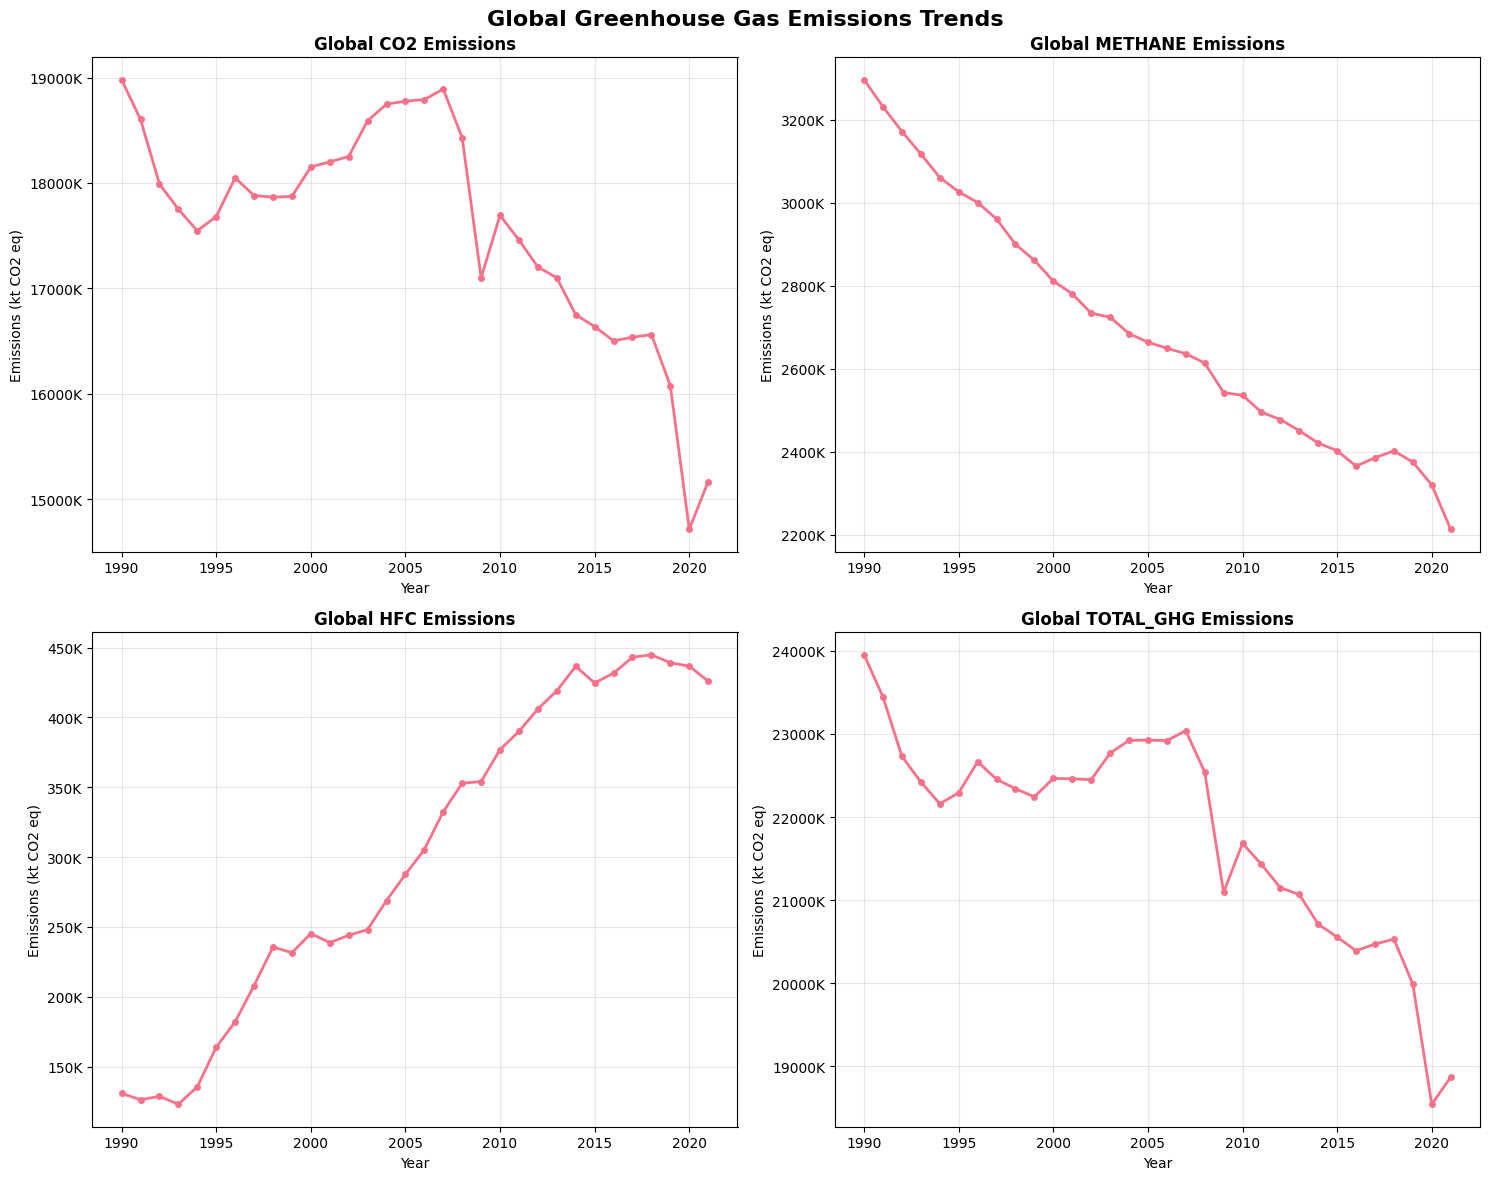

Creating top emitters visualization...


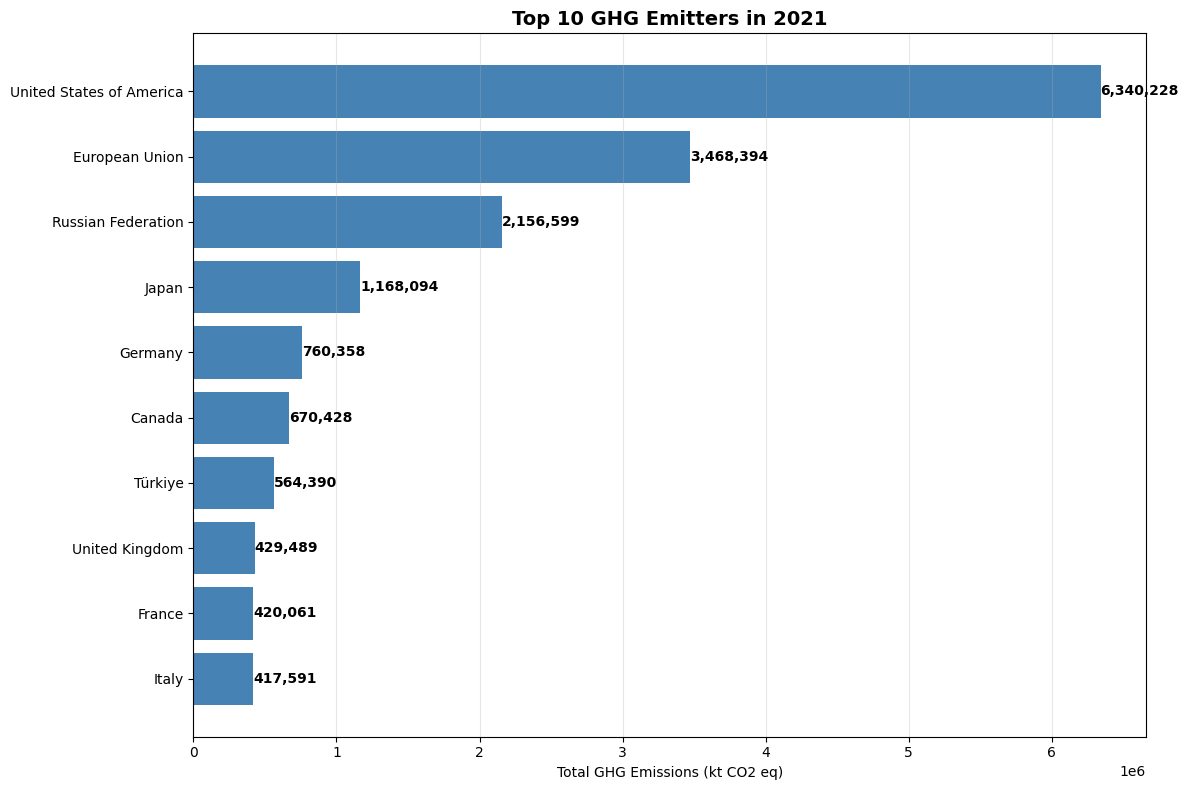

Creating regional comparison...


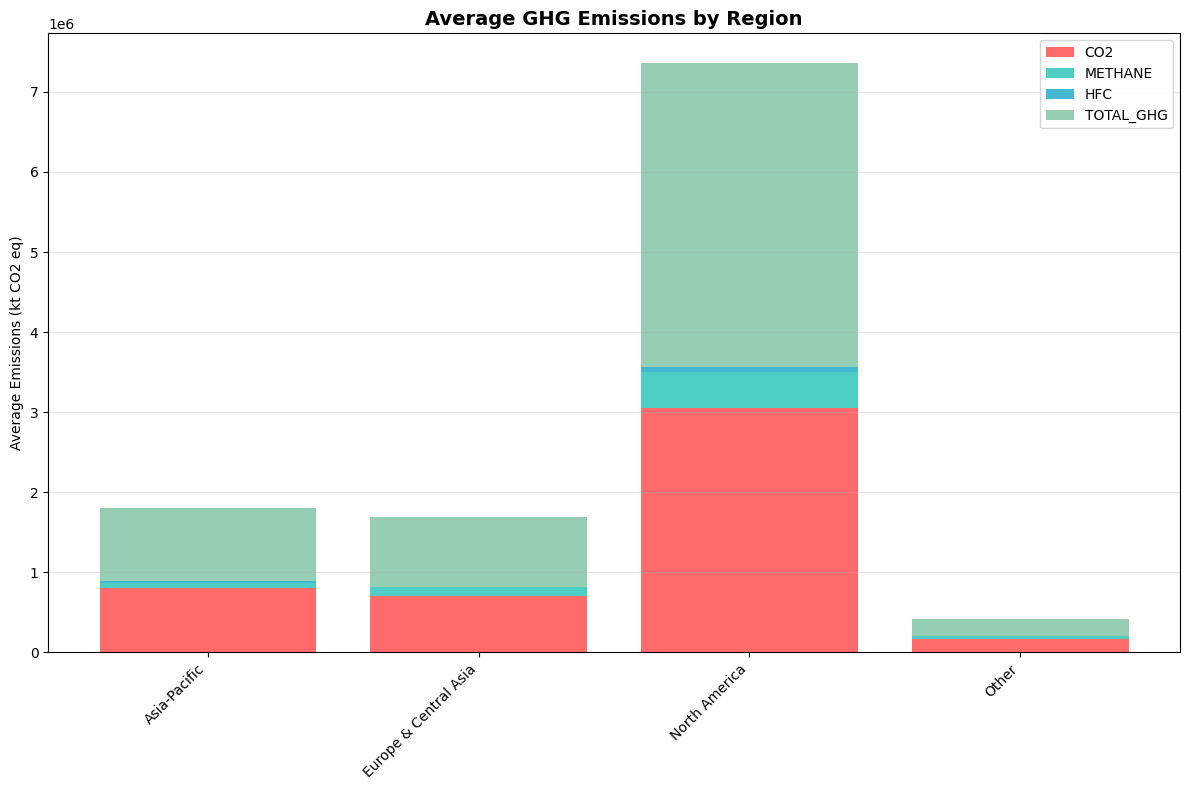

Creating correlation heatmap...


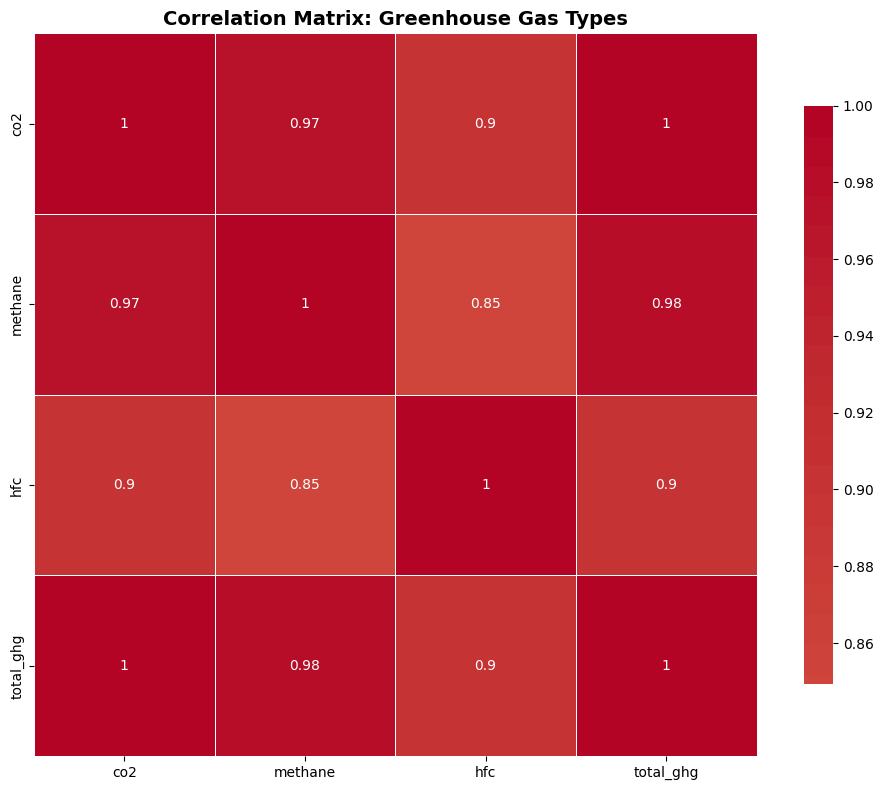

Creating time series for major emitters...


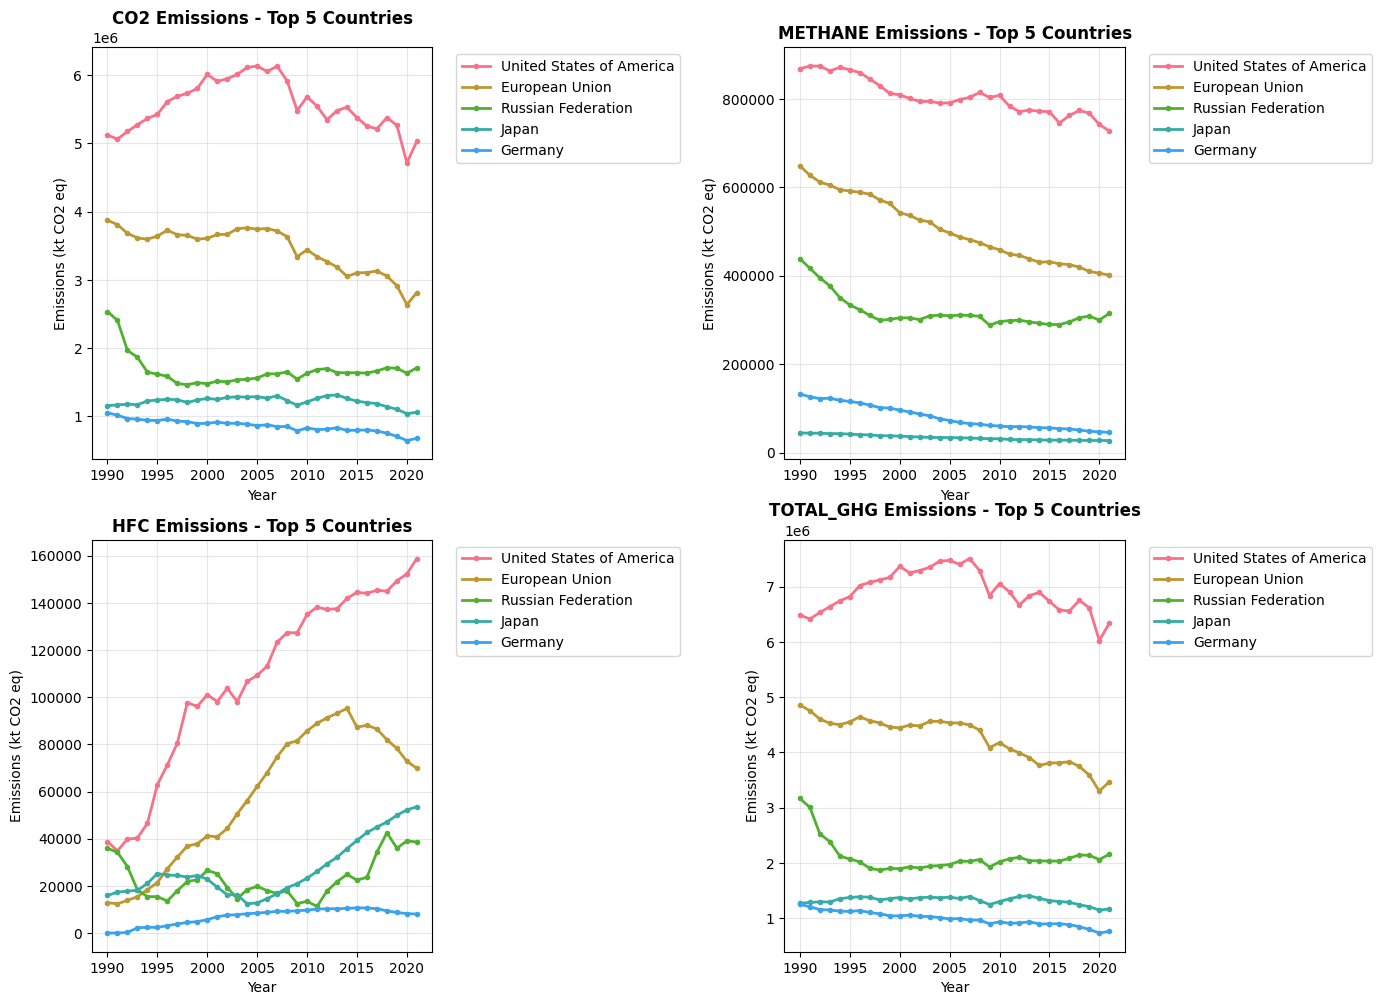

In [29]:
# Create visualizations
print("=== CREATING VISUALIZATIONS ===\n")

# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
gas_columns = [col for col in ['co2', 'methane', 'hfc', 'total_ghg'] if col in df_master.columns]

# 1. Global trends over time
if gas_columns and not df_master.empty:
    print("Creating global trends visualization...")
    
    # Calculate global totals by year
    global_totals = df_master.groupby('Year')[gas_columns].sum().reset_index()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Global Greenhouse Gas Emissions Trends', fontsize=16, fontweight='bold')
    
    for i, gas in enumerate(gas_columns):
        row, col = i // 2, i % 2
        ax = axes[row, col]
        
        ax.plot(global_totals['Year'], global_totals[gas], marker='o', linewidth=2, markersize=4)
        ax.set_title(f'Global {gas.upper()} Emissions', fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Emissions (kt CO2 eq)')
        ax.grid(True, alpha=0.3)
        
        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x >= 1000 else f'{x:.0f}'))
    
    plt.tight_layout()
    plt.show()

# 2. Top emitters comparison
if 'total_ghg' in df_master.columns and not df_master.empty:
    print("Creating top emitters visualization...")
    
    # Get latest year data
    latest_year = df_master['Year'].max()
    latest_data = df_master[df_master['Year'] == latest_year]
    top_10 = latest_data.nlargest(10, 'total_ghg')
    
    # Create horizontal bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(top_10)), top_10['total_ghg'], color='steelblue')
    plt.yticks(range(len(top_10)), top_10['Country or Area'])
    plt.xlabel('Total GHG Emissions (kt CO2 eq)')
    plt.title(f'Top 10 GHG Emitters in {latest_year}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:,.0f}', ha='left', va='center', fontweight='bold')
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 3. Regional comparison
if 'Region' in df_master.columns and gas_columns:
    print("Creating regional comparison...")
    
    # Calculate average emissions by region
    regional_avg = df_master.groupby('Region')[gas_columns].mean()
    
    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    
    bottom = np.zeros(len(regional_avg))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    
    for i, gas in enumerate(gas_columns):
        if gas in regional_avg.columns:
            ax.bar(regional_avg.index, regional_avg[gas], bottom=bottom, 
                  label=gas.upper(), color=colors[i % len(colors)])
            bottom += regional_avg[gas]
    
    ax.set_title('Average GHG Emissions by Region', fontweight='bold', fontsize=14)
    ax.set_ylabel('Average Emissions (kt CO2 eq)')
    ax.legend()
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4. Correlation heatmap
if len(gas_columns) > 1:
    print("Creating correlation heatmap...")
    
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_master[gas_columns].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix: Greenhouse Gas Types', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.show()

# 5. Time series for selected countries
if gas_columns and not df_master.empty:
    print("Creating time series for major emitters...")
    
    # Select top 5 countries by latest total emissions
    if 'total_ghg' in df_master.columns:
        latest_year = df_master['Year'].max()
        top_countries = df_master[df_master['Year'] == latest_year].nlargest(5, 'total_ghg')['Country or Area'].tolist()
        
        plt.figure(figsize=(14, 10))
        
        for i, gas in enumerate(gas_columns):
            plt.subplot(2, 2, i+1)
            
            for country in top_countries:
                country_data = df_master[df_master['Country or Area'] == country].sort_values('Year')
                plt.plot(country_data['Year'], country_data[gas], marker='o', 
                        linewidth=2, markersize=3, label=country)
            
            plt.title(f'{gas.upper()} Emissions - Top 5 Countries', fontweight='bold')
            plt.xlabel('Year')
            plt.ylabel('Emissions (kt CO2 eq)')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## 8. Data Export for Dashboard

Finally, let's export our processed and feature-engineered data for use in the Streamlit dashboard.

In [30]:
# Export processed data for dashboard
print("=== EXPORTING DATA FOR DASHBOARD ===\n")

# 1. Export master dataset (wide format with all features)
master_file = 'greenhouse_gas_master_dataset.csv'
df_master.to_csv(master_file, index=False)
print(f"Exported master dataset: {master_file}")
print(f"   Shape: {df_master.shape}")
print(f"   Columns: {len(df_master.columns)}")

# 2. Export long format dataset (for certain visualizations)
long_file = 'greenhouse_gas_long_format.csv'
combined_long.to_csv(long_file, index=False)
print(f"Exported long format dataset: {long_file}")
print(f"   Shape: {combined_long.shape}")

# 3. Export country statistics
stats_file = 'country_statistics.csv'
country_statistics.to_csv(stats_file)
print(f"Exported country statistics: {stats_file}")
print(f"   Shape: {country_statistics.shape}")

# 4. Create summary dataset for quick overview
if gas_columns:
    summary_data = {
        'total_countries': df_master['Country or Area'].nunique(),
        'year_range': f"{df_master['Year'].min()}-{df_master['Year'].max()}",
        'total_years': df_master['Year'].nunique(),
        'gas_types': len(gas_columns),
        'total_records': len(df_master),
        'regions': df_master['Region'].nunique() if 'Region' in df_master.columns else 0
    }
    
    # Export summary
    summary_df = pd.DataFrame([summary_data])
    summary_file = 'dataset_summary.csv'
    summary_df.to_csv(summary_file, index=False)
    print(f"Exported dataset summary: {summary_file}")

# 5. Export latest year data for dashboard highlights
if not df_master.empty:
    latest_year = df_master['Year'].max()
    latest_data = df_master[df_master['Year'] == latest_year]
    latest_file = f'latest_emissions_{latest_year}.csv'
    latest_data.to_csv(latest_file, index=False)
    print(f"Exported latest year data ({latest_year}): {latest_file}")
    print(f"   Shape: {latest_data.shape}")

# Display final summary
print(f"\nFINAL DATA SUMMARY")
print("=" * 50)
print(f"Master dataset shape: {df_master.shape}")
print(f"Countries analyzed: {df_master['Country or Area'].nunique()}")
print(f"Year range: {df_master['Year'].min()} - {df_master['Year'].max()}")
print(f"Gas types: {', '.join(gas_columns)}")
if 'Region' in df_master.columns:
    print(f"Regions: {', '.join(df_master['Region'].unique())}")

print(f"\nReady for dashboard creation!")
print(f"Next step: Create Streamlit dashboard using the exported CSV files")

=== EXPORTING DATA FOR DASHBOARD ===

Exported master dataset: greenhouse_gas_master_dataset.csv
   Shape: (1375, 33)
   Columns: 33
Exported long format dataset: greenhouse_gas_long_format.csv
   Shape: (5425, 4)
Exported country statistics: country_statistics.csv
   Shape: (43, 16)
Exported dataset summary: dataset_summary.csv
Exported latest year data (2021): latest_emissions_2021.csv
   Shape: (42, 33)

FINAL DATA SUMMARY
Master dataset shape: (1375, 33)
Countries analyzed: 43
Year range: 1990 - 2021
Gas types: co2, methane, hfc, total_ghg
Regions: Asia-Pacific, Other, North America, Europe & Central Asia

Ready for dashboard creation!
Next step: Create Streamlit dashboard using the exported CSV files


## 9. Conclusions and Next Steps

### Key Findings from EDA:

1. **Data Quality**: 
   - Successfully loaded and cleaned 4 greenhouse gas datasets
   - Identified missing values and handled them appropriately
   - Created comprehensive feature engineering pipeline

2. **Feature Engineering**:
   - Created time-based features (decades, year groups)
   - Calculated proportions and year-over-year changes
   - Added regional classifications and emission categories
   - Generated moving averages and cumulative metrics

3. **Data Coverage**:
   - Multiple greenhouse gas types: CO2, Methane, HFC, Total GHG
   - Multi-year time series data
   - Global country coverage with regional groupings

### Exported Files for Dashboard:

1. **`greenhouse_gas_master_dataset.csv`** - Main dataset with all features
2. **`greenhouse_gas_long_format.csv`** - Long format for specific visualizations  
3. **`country_statistics.csv`** - Aggregated country-level statistics
4. **`dataset_summary.csv`** - Overview statistics
5. **`latest_emissions_[year].csv`** - Most recent year data

### Next Steps:

1. **Dashboard Development**:
   - Create interactive Streamlit dashboard
   - Implement multiple visualization types
   - Add filtering and drill-down capabilities
   - Include comparative analysis features

2. **Advanced Analytics**:
   - Time series forecasting
   - Country clustering analysis
   - Emission reduction target tracking
   - Policy impact assessment

All necessary files have been exported and are ready for dashboard creation with Streamlit.